Починаємо K-Means кластеризацію на 12 точках з K=2.
Початкові центри: [2. 4.] та [4. 6.]
Ітерація 1: Рух центрів = 6.0417
Ітерація 2: Рух центрів = 0.0000

*** Збіжність досягнута на ітерації 2! ***

Кластеризація завершена.
Фінальні центри:
  Кластер 1: (2.200, 1.280)
  Кластер 2: (6.643, 8.000)


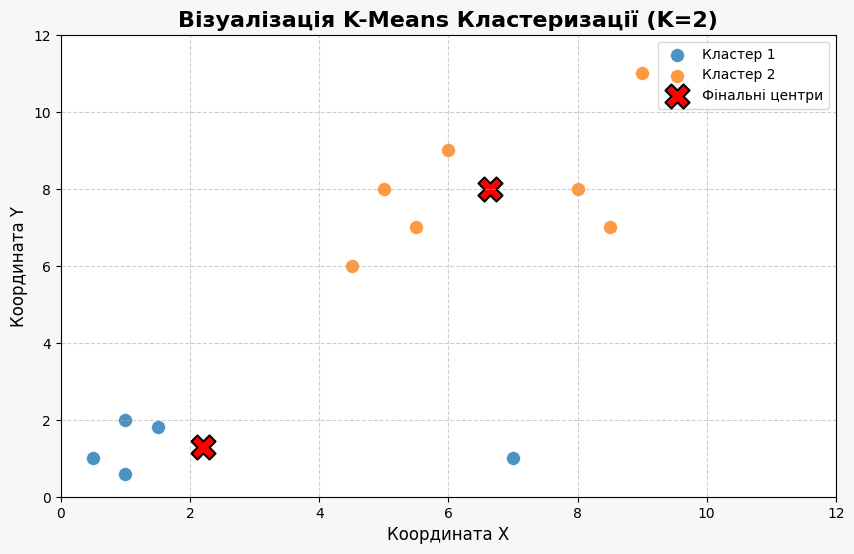

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [1.0, 2.0], [1.5, 1.8], [5.0, 8.0], [8.0, 8.0],
    [1.0, 0.6], [9.0, 11.0], [0.5, 1.0], [8.5, 7.0],
    [7.0, 1.0], [6.0, 9.0], [5.5, 7.0], [4.5, 6.0]
])

# 2. Визначення початкових центрів (K=2)
# (2, 4) та (4, 6)
initial_centers = np.array([
    [2.0, 4.0],
    [4.0, 6.0]
])

K = len(initial_centers)

print(f"Починаємо K-Means кластеризацію на {len(data)} точках з K={K}.")
print(f"Початкові центри: {initial_centers[0]} та {initial_centers[1]}")

def manual_kmeans(data, initial_centers, max_iterations=100, tolerance=1e-4):
    """
    Реалізація алгоритму K-Means вручну з використанням NumPy.
    """
    centers = initial_centers.copy()
    num_points = data.shape[0]
    K = centers.shape[0]
    
    # Ініціалізація міток
    labels = np.zeros(num_points, dtype=int)
    
    # Основний цикл K-Means
    for iteration in range(max_iterations):
        old_centers = centers.copy()
        
        # 1. Крок присвоєння (Assignment Step)
        # Розрахунок квадрата Евклідової відстані між кожною точкою та кожним центром.
        # Використовуємо broadcast для ефективного обчислення
        # [K, N, D] - N points, K centers, D dimensions (D=2)
        # N=12, K=2, D=2
        distances = np.sum((data - centers[:, np.newaxis])**2, axis=2)
        
        # Знаходимо індекс центру з мінімальною відстанню
        labels = np.argmin(distances, axis=0)

        # 2. Крок оновлення (Update Step)
        new_centers = np.zeros_like(centers)
        counts = np.zeros(K, dtype=int)

        # Обчислюємо суму координат та кількість точок для кожного кластера
        for i in range(num_points):
            cluster_id = labels[i]
            new_centers[cluster_id] += data[i]
            counts[cluster_id] += 1
        
        # Розраховуємо нові центри (середнє значення)
        for i in range(K):
            if counts[i] > 0:
                centers[i] = new_centers[i] / counts[i]
            # Якщо кластер порожній, центр залишається на місці
                
        # 3. Перевірка на збіжність (Convergence Check)
        # Сумарний рух центрів
        center_movement = np.sum(np.sqrt(np.sum((centers - old_centers)**2, axis=1)))
        
        print(f"Ітерація {iteration + 1}: Рух центрів = {center_movement:.4f}")
        
        if center_movement < tolerance:
            print(f"\n*** Збіжність досягнута на ітерації {iteration + 1}! ***")
            break
            
    return centers, labels

try:
    final_centers, labels = manual_kmeans(data, initial_centers, max_iterations=100, tolerance=1e-4)

    print("\nКластеризація завершена.")
    print("Фінальні центри:")
    for i, center in enumerate(final_centers):
        print(f"  Кластер {i+1}: ({center[0]:.3f}, {center[1]:.3f})")

    plt.figure(figsize=(10, 6), facecolor='#f7f7f7')
    
    colors = ['#1f77b4', '#ff7f0e']

    for i in range(K):
        cluster_data = data[labels == i]
        plt.scatter(
            cluster_data[:, 0], 
            cluster_data[:, 1], 
            s=100,
            c=colors[i], 
            label=f'Кластер {i+1}', 
            alpha=0.8,
            edgecolors='w',
            linewidth=0.5
        )

    plt.scatter(
        final_centers[:, 0], 
        final_centers[:, 1], 
        marker='X', 
        s=300,
        c='red', 
        label='Фінальні центри',
        edgecolors='black',
        linewidth=1.5
    )
    
    plt.title('Візуалізація K-Means Кластеризації (K=2)', fontsize=16, fontweight='bold')
    plt.xlabel('Координата X', fontsize=12)
    plt.ylabel('Координата Y', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.xlim(0, 12)
    plt.ylim(0, 12)

    plt.show()
    

except Exception as e:
    print(f"\nСталася помилка під час кластеризації або побудови графіку: {e}")